# Y0~18 사이 상관관계 구하기
https://dacon.io/competitions/official/235584/codeshare/707

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('./data/train.csv', encoding = 'utf-8', header = 1)
test = pd.read_csv('./data/test.csv', encoding = 'utf-8')

In [13]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [14]:
target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18']
train[target].head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [15]:
## 1) Y18이 null => Y0 ~ Y17은 not null
temp = train[train['Y18'].isnull()]

In [16]:
temp.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [17]:
print(temp.iloc[:,-19:-1].isnull().any())

Y00    False
Y01    False
Y02    False
Y03    False
Y04    False
Y05    False
Y06    False
Y07    False
Y08    False
Y09    False
Y10    False
Y11    False
Y12    False
Y13    False
Y14    False
Y15    False
Y16    False
Y17    False
dtype: bool


In [18]:
## 2) Y0 ~ Y17이 null => Y18은 not null
temp = train[~train['Y18'].isnull()]

In [19]:
print(temp.iloc[:,-19:-1].isnull().any())

Y00    True
Y01    True
Y02    True
Y03    True
Y04    True
Y05    True
Y06    True
Y07    True
Y08    True
Y09    True
Y10    True
Y11    True
Y12    True
Y13    True
Y14    True
Y15    True
Y16    True
Y17    True
dtype: bool


In [20]:
#Y18이 not null인 데이터(즉, y18의 3일치 데이터)
train[~train['Y18'].isnull()]['Y18']

4320    20.5
4321    20.5
4322    20.5
4323    20.5
4324    20.5
        ... 
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Name: Y18, Length: 432, dtype: float64

In [21]:
#index 새로 부여한 데이터 생성
y18 = train[~train['Y18'].isnull()]['Y18'].reset_index(drop= True)

In [24]:
print(y18)

0      20.5
1      20.5
2      20.5
3      20.5
4      20.5
       ... 
427    21.5
428    21.5
429    21.5
430    21.5
431    21.0
Name: Y18, Length: 432, dtype: float64


In [26]:
#Y18이 비어있는 30일간의 Y0~Y17
no_y18_target = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08','Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
no_y18 = train[(train['Y18'].isnull()) & (train['id'] > 3887)][no_y18_target].reset_index(drop = True)

In [27]:
print(no_y18)

      Y00   Y01   Y02   Y03   Y04   Y05   Y06   Y07   Y08   Y09   Y10   Y11  \
0    20.5  20.5  20.5  25.5  25.5  19.5  18.5  19.0  19.5  17.5  18.5  17.5   
1    20.0  20.5  20.5  25.5  25.5  19.5  18.5  19.0  19.5  17.0  18.0  17.5   
2    20.0  20.0  20.5  25.5  25.5  19.5  18.0  19.0  19.0  17.0  18.0  17.0   
3    20.0  20.0  20.0  25.5  25.0  19.5  18.0  19.0  19.0  17.0  18.0  17.0   
4    19.5  20.0  20.0  25.0  25.0  19.5  18.0  18.5  19.0  17.0  17.5  17.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
427  22.0  22.5  22.5  26.0  26.0  21.0  20.0  20.5  20.5  19.5  20.0  19.0   
428  22.0  22.5  22.5  26.0  25.5  21.0  20.0  20.5  20.5  19.5  20.0  19.0   
429  21.5  22.5  22.5  26.0  25.5  21.0  20.0  20.5  20.5  19.5  20.0  19.0   
430  21.5  22.0  22.0  25.5  25.5  20.5  20.0  20.0  20.0  19.5  20.0  18.5   
431  21.5  22.0  22.0  25.5  25.5  20.5  19.5  20.0  20.0  19.5  20.0  18.5   

      Y12   Y13   Y14   Y15   Y16   Y17  
0    18.5

In [28]:
#3일치와 30일치를 concat함.
check_target = pd.concat([no_y18, y18], axis = 1)

In [29]:
check_target.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5


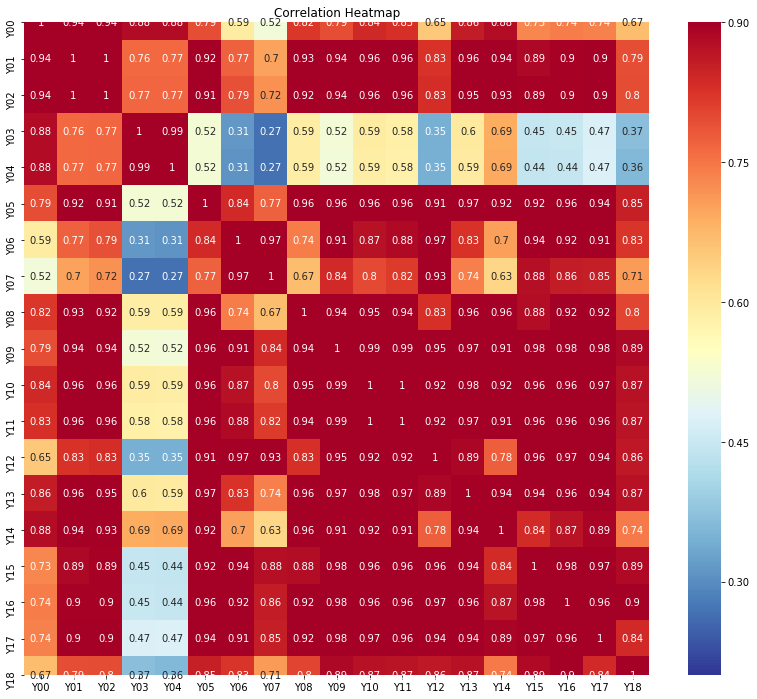

In [30]:
correlations =  check_target.corr()
plt.figure(figsize = (14, 12))

# Heatmap of correlations
sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Correlation Heatmap');

Y18과 Y3, Y4는 상관성이 매우 낮아보임
Y18과 가장 높은 상관을 보이는 것은 Y16(1등), Y9와 Y15(2등), Y10과 Y11과 Y13(3등) 순서임

In [31]:
check_target.reset_index(inplace = True)

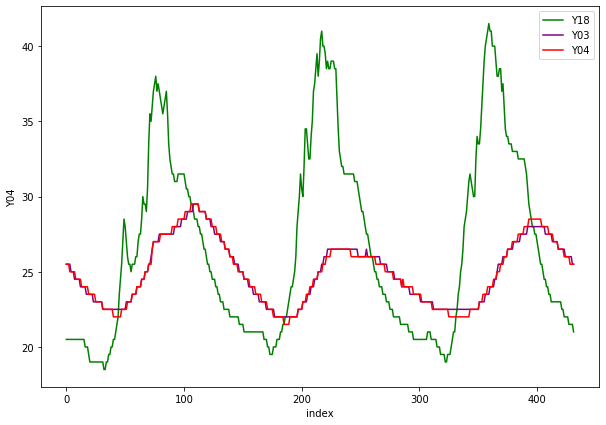

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y03', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y04', color='red', ax=ax)
plt.legend(['Y18', 'Y03', 'Y04'])
plt.show()

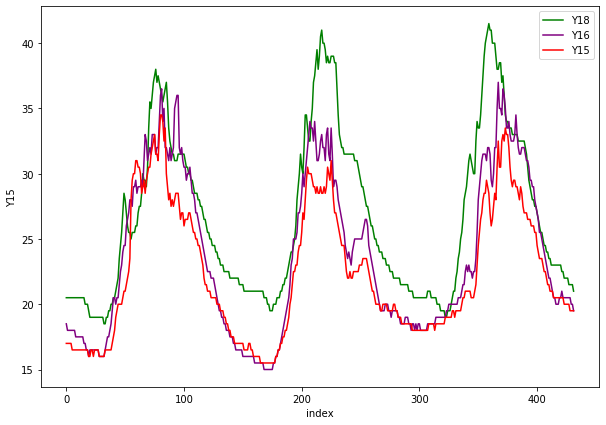

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=check_target, x='index', y='Y18', color='green', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y16', color='purple', ax=ax)
sns.lineplot(data=check_target, x='index', y='Y15', color='red', ax=ax)
plt.legend(['Y18', 'Y16', 'Y15'])
plt.show()

Plot으로 다시 한번 확인 가능

# Transfer Learning 하기
https://dacon.io/competitions/official/235584/codeshare/731

In [1]:
from tqdm import tqdm
import random
import tensorflow as tf
import os

In [3]:
print(tf.__version__)
print(tf.test.is_gpu_available())

1.13.1
False


In [5]:
# 재생산성을 위해 시드 고정
np.random.seed(7)
random.seed(7)
tf.set_random_seed(7)

In [31]:
train = pd.read_csv('./data/train.csv', encoding = 'utf-8', header = 1, index_col = 'id')
test = pd.read_csv('./data/test.csv', encoding = 'utf-8', index_col = 'id')

In [32]:
train.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,432.000000
mean,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,1008.394171,...,22.222801,23.737269,24.649653,23.641898,20.926157,21.319444,21.564468,22.969097,23.381829,26.687500
std,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,3.546180,...,9.112299,10.599000,12.214870,8.400081,6.106031,7.066149,6.810084,8.054272,9.275172,6.286621
min,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,996.300000,...,3.500000,4.000000,3.000000,6.000000,7.500000,7.500000,7.000000,6.000000,7.000000,18.500000
25%,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,1006.300000,...,15.500000,15.500000,15.000000,17.000000,16.500000,16.500000,16.500000,16.500000,16.000000,21.000000
50%,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,1008.400000,...,20.000000,20.500000,21.000000,22.000000,19.500000,19.500000,20.000000,21.500000,20.000000,25.000000
75%,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,1010.900000,...,30.500000,32.500000,34.500000,30.500000,25.000000,25.000000,27.000000,30.000000,32.000000,31.500000
max,30.900000,997.200000,10.200000,5.800000,25.600000,1016.800000,997.400000,32.700000,1017.500000,1018.000000,...,42.000000,49.000000,53.000000,43.500000,38.000000,42.500000,40.500000,41.500000,43.500000,41.500000


In [33]:
test.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,...,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000,11520.000000
mean,25.145625,987.616693,1.401033,1.479436,2.396016,1006.869314,987.839045,26.032352,1007.321424,1006.938741,...,76.208698,24.544392,24.519905,1007.319826,8.480451,172.389991,2.266267,79.336875,71.271146,2.332856
std,3.824374,4.624002,1.376209,1.087042,6.382526,4.757237,4.637961,3.513596,4.788943,4.777357,...,15.845644,4.040956,4.021288,4.778875,8.997879,109.130854,8.564625,14.861512,15.016123,6.591677
min,15.500000,970.300000,0.000000,0.000000,0.000000,990.000000,971.300000,17.300000,990.500000,989.200000,...,25.800000,14.200000,15.100000,990.900000,0.000000,0.000000,0.000000,27.500000,22.800000,0.000000
25%,22.300000,985.300000,0.400000,0.700000,0.000000,1004.400000,985.500000,23.300000,1004.900000,1004.500000,...,64.400000,21.500000,21.400000,1004.800000,0.000000,73.100000,0.000000,68.600000,60.700000,0.000000
50%,25.300000,987.900000,1.100000,1.300000,0.000000,1007.200000,988.100000,26.100000,1007.700000,1007.300000,...,79.800000,24.500000,24.500000,1007.600000,5.715000,178.800000,0.000000,82.100000,72.000000,0.000000
75%,27.600000,990.700000,2.000000,2.000000,0.700000,1010.000000,991.000000,28.300000,1010.500000,1010.100000,...,90.200000,27.200000,27.300000,1010.400000,15.860000,261.400000,0.100000,92.725000,84.300000,0.500000
max,36.300000,998.100000,11.000000,10.900000,46.500000,1018.000000,998.500000,36.000000,1018.500000,1017.900000,...,97.200000,35.300000,35.800000,1018.400000,31.640000,359.900000,97.700000,96.800000,95.900000,79.500000


In [1]:
# 기상청 데이터만 추출
X_train = train.loc[:,'X00':'X39']

# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가 
X_train = (X_train - MEAN) / (STD + 1e-07)

NameError: name 'train' is not defined

In [35]:
# RNN 모델에 입력 할 수 있는 시계열 형태로 데이터 변환 
def convert_to_timeseries(df, interval):
    sequence_list = []
    target_list = []
    
    for i in tqdm(range(df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-1]))
        target_list.append(df.iloc[i+interval,-1])
    
    sequence = np.array(sequence_list)
    target = np.array(target_list)
    
    return sequence, target

토론 글에 기반하여, Y15와 Y16 지점의 데이터가 Y18과 상관관계가 높음. 그래서 두 지점의 데이터를 학습하기로 결정.

In [36]:
y_columns = ['Y15','Y16']

In [37]:
# t시점 이전 120분의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
sequence = np.empty((0, 12, 40))
target = np.empty((0,))
for column in y_columns :
    
    concat = pd.concat([X_train, train[column]], axis = 1)

    _sequence, _target = convert_to_timeseries(concat.head(144*30), interval = 12)

    sequence = np.vstack((sequence, _sequence))
    target = np.hstack((target, _target))

100%|████████████████████████████████████████████████████████████████████████████| 4308/4308 [00:01<00:00, 3894.40it/s]


In [38]:
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
X_train['dummy'] = 0

In [39]:
# train set에서 도출된 평균과 표준편차로 standardization 실시 
test = (test - MEAN) / (STD + 1e-07)

In [40]:
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
test['dummy'] = 0

In [41]:
# train과 test 기간을 합쳐서 120분 간격으로 학습데이터 재구축
X_test, _ = convert_to_timeseries(pd.concat([X_train, test], axis = 0), interval=12)

100%|██████████████████████████████████████████████████████████████████████████| 16260/16260 [00:05<00:00, 3179.79it/s]


In [42]:
# test set 기간인 후반부 80일에 맞게 자르기 
X_test = X_test[-11520:, :, :]

In [43]:
# 만들어 두었던 dummy feature 제거
X_train.drop('dummy', axis = 1, inplace = True)
test.drop('dummy', axis = 1, inplace = True)

In [44]:
# 간단한 lstm 모델 구축하기 
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=sequence.shape[-2:]),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse')

In [45]:
# loss가 4미만으로 떨어지면 학습 종료 시키는 기능
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if(logs.get('loss') < 4):
            print('\n Loss is under 4, cancelling training')
            self.model.stop_training = True

In [46]:
callbacks = myCallback()

In [47]:
# 모델 학습
simple_lstm_model.fit(    
    sequence, target,
    epochs=60,
    batch_size=128,
    verbose=2,
    shuffle=False,
    callbacks = [callbacks]
)

Epoch 1/60
 - 3s - loss: 249.4511
Epoch 2/60
 - 1s - loss: 124.5090
Epoch 3/60
 - 1s - loss: 80.4644
Epoch 4/60
 - 1s - loss: 63.0067
Epoch 5/60
 - 1s - loss: 56.7090
Epoch 6/60
 - 1s - loss: 37.3769
Epoch 7/60
 - 1s - loss: 24.0465
Epoch 8/60
 - 1s - loss: 16.7431
Epoch 9/60
 - 1s - loss: 12.4199
Epoch 10/60
 - 1s - loss: 9.9514
Epoch 11/60
 - 1s - loss: 8.7802
Epoch 12/60
 - 1s - loss: 7.9246
Epoch 13/60
 - 1s - loss: 7.0648
Epoch 14/60
 - 1s - loss: 6.5229
Epoch 15/60
 - 1s - loss: 6.0655
Epoch 16/60
 - 1s - loss: 5.8648
Epoch 17/60
 - 1s - loss: 5.5041
Epoch 18/60
 - 1s - loss: 5.1821
Epoch 19/60
 - 1s - loss: 5.0201
Epoch 20/60
 - 1s - loss: 4.7883
Epoch 21/60
 - 2s - loss: 4.3672
Epoch 22/60
 - 1s - loss: 4.3605
Epoch 23/60
 - 1s - loss: 4.2441
Epoch 24/60
 - 1s - loss: 4.1076
Epoch 25/60

 Loss is under 4, cancelling training
 - 1s - loss: 3.9059


In [48]:
# LSTM 레이어는 고정
simple_lstm_model.layers[0].trainable = False

In [49]:
# fine tuning 할 때 사용할 학습데이터 생성 (Y18)
finetune_X, finetune_y = convert_to_timeseries(pd.concat([X_train.tail(432), train['Y18'].tail(432)], axis = 1), interval=12)

100%|██████████████████████████████████████████████████████████████████████████████| 420/420 [00:00<00:00, 2385.70it/s]


In [50]:
# LSTM 레이어는 고정 시켜두고, DNN 레이어에 대해서 fine tuning 진행 (Transfer Learning)
finetune_history = simple_lstm_model.fit(
            finetune_X, finetune_y,
            epochs=25,
            batch_size=64,
            shuffle=False,
            verbose = 2)

Epoch 1/25
 - 0s - loss: 7.9141
Epoch 2/25
 - 0s - loss: 5.4209
Epoch 3/25
 - 0s - loss: 4.8511
Epoch 4/25
 - 0s - loss: 4.1016
Epoch 5/25
 - 0s - loss: 3.6194
Epoch 6/25
 - 0s - loss: 3.3066
Epoch 7/25
 - 0s - loss: 3.1247
Epoch 8/25
 - 0s - loss: 2.9714
Epoch 9/25
 - 0s - loss: 2.8093
Epoch 10/25
 - 0s - loss: 2.6609
Epoch 11/25
 - 0s - loss: 2.5470
Epoch 12/25
 - 0s - loss: 2.4315
Epoch 13/25
 - 0s - loss: 2.3001
Epoch 14/25
 - 0s - loss: 2.1689
Epoch 15/25
 - 0s - loss: 2.0954
Epoch 16/25
 - 0s - loss: 1.9795
Epoch 17/25
 - 0s - loss: 1.8542
Epoch 18/25
 - 0s - loss: 1.7733
Epoch 19/25
 - 0s - loss: 1.6899
Epoch 20/25
 - 0s - loss: 1.6006
Epoch 21/25
 - 0s - loss: 1.5331
Epoch 22/25
 - 0s - loss: 1.4639
Epoch 23/25
 - 0s - loss: 1.4062
Epoch 24/25
 - 0s - loss: 1.3458
Epoch 25/25
 - 0s - loss: 1.2947


In [51]:
# 예측하기 
finetune_pred = simple_lstm_model.predict(X_test)

In [52]:
# 제출 파일 만들기
submit = pd.DataFrame({'id':range(144*33, 144*113),
              'Y18':finetune_pred.reshape(1,-1)[0]})

In [53]:
submit.to_csv('baseline_result.csv', index = False)

In [54]:
submit.head()

,id,Y18
0,4752,20.900927
1,4753,20.762854
2,4754,20.665445
3,4755,20.459698
4,4756,19.955067
